# CIS 5450 Final Project – Flight Fare Prediction
*Ange Christa Dushime, Christian Ishimwe, Bruno Ndiba Mbwaye Roy*

In [300]:
# imports we willl need
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import clone
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.base import clone


## Part 1: Introduction

For our final project, we aim to better understand the key drivers of flight fare variability within the Bangladesh aviation ecosystem.
To accomplish this, we utilize the [*Flight Price Dataset of Bangladesh*](https://), a 57,000-row dataset that simulates realistic flight records, including airline operations, airport specifics, travel classes, booking methods, and temporal patterns.

Our primary objective is to predict **Total Fare (BDT)** using a variety of flight-related features.
This requires exploring relationships between fare and factors such as travel class, days before departure, stopovers, route characteristics, airline, duration, and seasonality.

The results of our analysis are presented throughout this notebook. At each stage—data cleaning, feature engineering, exploratory data analysis (EDA), and modeling—we provide clear explanations of the motivation behind each step and our key findings.
Our insights help build an interpretable and data-driven understanding of the dynamics that govern air travel pricing.

We hope you find our results insightful, and we look forward to discussing any questions you may have.


## Part 2: Data Loading & Preprocessing

### 2.1 Loading the Dataset

In this subsection, we load the *Flight Price Dataset of Bangladesh* into our working environment.  
We upload the CSV file manually through Google Colab, then read it into a pandas DataFrame for initial inspection.  
This step ensures the dataset is correctly imported and ready for preprocessing and exploratory analysis in the following sections.



In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [302]:
# Load CSV
flight_df = pd.read_csv('Flight_Price_Dataset_of_Bangladesh.csv')

### 2.2 Analyzing Data Structure

Before performing preprocessing or feature engineering, we take a closer look at the structure of the dataset.  
This includes previewing sample rows, inspecting column datatypes, checking for missing values, and computing descriptive statistics.  
These steps help us understand the raw data and identify which cleaning operations are necessary in the following sections.


In [303]:
# Preview first five rows
flight_df.head(10)

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90
5,IndiGo,ZYL,"Osmani International Airport, Sylhet",SPD,Saidpur Airport,2025-06-18 18:28:00,2025-06-18 19:33:06,1.085066,Direct,Airbus A320,Business,Travel Agency,5036.394160,200.000000,5236.394160,Regular,70
6,US-Bangla Airlines,SPD,Saidpur Airport,BZL,Barisal Airport,2025-10-25 22:41:00,2025-10-25 23:45:41,1.078155,Direct,Airbus A320,Business,Direct Booking,7397.669874,200.000000,7597.669874,Regular,28
7,AirAsia,JSR,Jessore Airport,LHR,London Heathrow Airport,2025-12-28 01:38:00,2025-12-28 10:30:49,8.880376,1 Stop,Airbus A350,Economy,Online Website,11946.813583,7792.022037,19738.835620,Winter Holidays,12
8,Etihad Airways,SPD,Saidpur Airport,KUL,Kuala Lumpur International Airport,2025-07-06 21:52:00,2025-07-07 01:09:46,3.296282,Direct,Boeing 787,Business,Travel Agency,74973.621871,17246.043281,92219.665152,Regular,23
9,US-Bangla Airlines,DAC,"Hazrat Shahjalal International Airport, Dhaka",DEL,"Indira Gandhi International Airport, Delhi",2025-04-14 23:19:00,2025-04-15 01:54:44,2.595620,Direct,Boeing 787,First Class,Direct Booking,116951.645445,19542.746817,136494.392261,Regular,41


In [304]:
# Inspect datatypes and missing values
flight_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  object 
 1   Source                 57000 non-null  object 
 2   Source Name            57000 non-null  object 
 3   Destination            57000 non-null  object 
 4   Destination Name       57000 non-null  object 
 5   Departure Date & Time  57000 non-null  object 
 6   Arrival Date & Time    57000 non-null  object 
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  object 
 9   Aircraft Type          57000 non-null  object 
 10  Class                  57000 non-null  object 
 11  Booking Source         57000 non-null  object 
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Se

**Dataset Overview**

- `flight_df.info()` confirms that the dataset contains 57,000 rows and 17 columns
  with no missing values detected by Pandas. However, this does not guarantee that
  the data is fully clean — some missing or invalid values may appear as placeholder
  strings rather than NaN.

- We observe that many columns such as *Departure Date & Time*, *Arrival Date & Time*,
  *Source*, *Destination*, *Class*, and *Seasonality* are stored as object (string)
  types and will require further cleaning or transformation in later sections.

In [305]:
# Summary statistics for numerical and categorical columns
flight_df.describe()

,Duration (hrs),Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Days Before Departure
count,57000.000000,57000.000000,57000.000000,57000.000000,57000.000000
mean,3.994955,58899.556573,11448.238494,71030.316199,45.460579
std,4.094043,68840.614499,12124.344329,81769.199536,26.015657
min,0.500000,1600.975688,200.000000,1800.975688,1.000000
25%,1.003745,8856.316983,200.000000,9602.699787,23.000000
50%,2.644656,31615.996792,9450.940481,41307.544990,45.000000
75%,5.490104,85722.930389,17513.046160,103800.906963,68.000000
max,15.831719,449222.933770,73383.440066,558987.332444,90.000000


**Summary Statistics**

The output of df.describe() shows:

Total Fare (BDT) ranges from 1,800 → 558,987, indicating a very wide price spread influenced by cabin class, aircraft type, airline, and distance.

Base Fare (BDT) and Tax & Surcharge also show large ranges with high standard deviations.

Duration (hrs) spans 0.5 → 15.8 hours, consistent with both short domestic and long-haul international flights.

Days Before Departure ranges from 1 to 90, which may be useful when modeling price fluctuations based on booking timing.

Overall, the initial inspection reveals that while the dataset is structurally
complete, several columns may require cleaning, type conversions, and standardization
in Section 2.3.

### **2.3 Data Cleaning & Preprocessing**



#### 2.3.1 Handling Redundant and Unnecessary Columns

Before performing our main analysis, we inspect the dataset for columns that are
redundant, overly high-cardinality, or unlikely to contribute predictive value.

Based on our review of `flight_df.info()` and domain understanding:

- **Source Name** and **Destination Name** duplicate information already contained in
  the airport codes (Source, Destination). Airport names are long strings with high
  cardinality and do not add unique information.
  
- **Departure Date & Time** and **Arrival Date & Time** will later be transformed into
  numerical features (e.g., day-of-week, hour, etc.), making the raw strings unnecessary
  in their current form.

- **Airline**, **Aircraft Type**, **Class**, **Seasonality**, and **Stopovers** will be
  used in modeling and therefore retained.

We remove only the purely redundant or overly descriptive text columns at this stage.


In [306]:
# Columns to drop because they are descriptive duplicates of codes
columns_to_drop = ['Source Name', 'Destination Name']

flight_df_clean = flight_df.drop(columns=columns_to_drop)
flight_df_clean.head()

,Airline,Source,Destination,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,CCU,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,CGP,2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,KUL,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,DAC,2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,YYZ,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


#### 2.3.2 Handling Placeholder and Invalid Values

In many real-world datasets, missing or invalid entries do not always appear as
standard NaN values. Instead, they may be encoded as placeholder strings such as
"-", "--", "N/A", or empty text entries. These values are not detected by
`DataFrame.info()` and can cause issues later in preprocessing (e.g., during
numeric conversion or one-hot encoding).

To ensure our dataset does not contain hidden missing values, we manually
inspected all object-type (categorical) columns by reviewing their unique
values. This allowed us to verify whether any placeholder strings or
irregular formatting patterns were present.


In [307]:
# Inspect categorical (object-type) columns for placeholder or invalid values
for col in flight_df_clean.select_dtypes(include=['object','float64', 'int64']).columns:
    print(f"\nColumn: {col}")
    print(flight_df_clean[col].unique())


Column: Airline
['Malaysian Airlines' 'Cathay Pacific' 'British Airways'
 'Singapore Airlines' 'IndiGo' 'US-Bangla Airlines' 'AirAsia'
 'Etihad Airways' 'Gulf Air' 'Emirates' 'Biman Bangladesh Airlines'
 'NovoAir' 'FlyDubai' 'Saudia' 'Thai Airways' 'Kuwait Airways' 'Air India'
 'Air Astra' 'Qatar Airways' 'Air Arabia' 'SriLankan Airlines' 'Vistara'
 'Lufthansa' 'Turkish Airlines']

Column: Source
['CXB' 'BZL' 'ZYL' 'RJH' 'SPD' 'JSR' 'DAC' 'CGP']

Column: Destination
['CCU' 'CGP' 'KUL' 'DAC' 'YYZ' 'SPD' 'BZL' 'LHR' 'DEL' 'ZYL' 'RJH' 'JSR'
 'CXB' 'IST' 'DXB' 'SIN' 'BKK' 'DOH' 'JFK' 'JED']

Column: Departure Date & Time
['2025-11-17 06:25:00' '2025-03-16 00:17:00' '2025-12-13 12:03:00' ...
 '2025-11-08 09:23:00' '2025-11-25 10:23:00' '2025-07-05 04:12:00']

Column: Arrival Date & Time
['2025-11-17 07:38:10' '2025-03-16 00:53:31' '2025-12-13 14:44:22' ...
 '2025-11-08 10:35:59' '2025-11-26 00:20:37' '2025-07-05 04:50:55']

Column: Duration (hrs)
[ 1.21952645  0.60863801  2.68965056 ...  1

After reviewing the unique values for all categorical features—including Airline, Source, Destination, Stopovers, Aircraft Type, Class, Booking Source, and Seasonality—we found no occurrences of placeholder symbols or irregular values. All entries appear valid and consistently formatted.

Next, we computed a complete missing-value summary across the entire dataframe:

In [308]:
missing_count = flight_df_clean.isna().sum()
missing_percentage = (missing_count / len(flight_df_clean) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percentage
})

missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage (%)


The summary resulted in an empty table, confirming that:

No columns contain standard NaN values

No hidden placeholder strings are present

No further cleaning or imputation is needed at this stage

Therefore, the dataset is fully complete and ready for further preprocessing and exploratory analysis.

#### 2.3.3. Converting Datetime Columns

To support time-based analysis (such as trip duration validation and departure patterns), we convert the two datetime fields from object to datetime64[ns].
Accurate datetime typing is essential for extracting features like hour, weekday, or computing time differences.
No other columns require dtype conversion at this stage.

In [309]:
# Convert date columns to datetime
date_cols = ["Departure Date & Time", "Arrival Date & Time"]

for col in date_cols:
    flight_df_clean[col] = pd.to_datetime(flight_df_clean[col], errors='coerce')

flight_df_clean.dtypes


Airline                          object
Source                           object
Destination                      object
Departure Date & Time    datetime64[ns]
Arrival Date & Time      datetime64[ns]
Duration (hrs)                  float64
Stopovers                        object
Aircraft Type                    object
Class                            object
Booking Source                   object
Base Fare (BDT)                 float64
Tax & Surcharge (BDT)           float64
Total Fare (BDT)                float64
Seasonality                      object
Days Before Departure             int64
dtype: object

## Part 3. Exploratory Data Analysis (EDA)

Before building predictive models, it is essential to understand the structure, patterns, and relationships within the dataset. Exploratory Data Analysis (EDA) helps reveal how different features interact with flight pricing, identify potential drivers of fare variability, and uncover irregularities or trends that may influence modeling decisions.

In this section, we analyze the distribution of fare-related variables, examine pricing differences across airlines and routes, explore temporal patterns (hour, day, month, and seasonality), and study how operational factors such as aircraft type, stopovers, and booking timing affect the total fare. These insights will guide the feature engineering and modeling strategies that follow.

### 3.1. Price Variable Analysis

We begin our analysis by examining the core price-related features: Base Fare, Tax & Surcharge, and Total Fare. Understanding their distributions is crucial because price variables in real-world airfare datasets are often heavily skewed due to premium classes, long-haul flights, and seasonal spikes.

By visualizing these variables using histograms and boxplots, we can evaluate:

Whether the price data follows a normal distribution or is skewed

The presence of extreme outliers

The relative contribution of base fare vs. taxes

Whether transformations (e.g., log-scaling) may be necessary in later modeling

This initial examination establishes a foundation for interpreting downstream patterns in pricing and ensures that our modeling approach accounts for the underlying structure of the target variable.

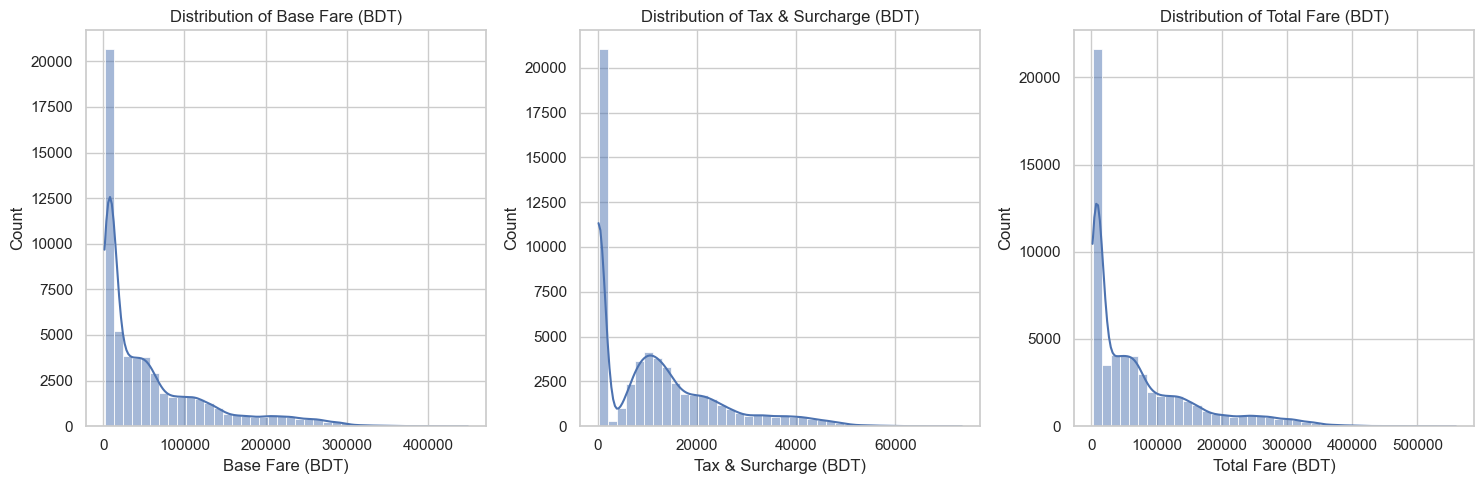

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns

price_cols = ['Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)']

plt.figure(figsize=(15, 5))
for i, col in enumerate(price_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(flight_df_clean[col], kde=True, bins=40)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


The distributions of Base Fare, Tax & Surcharge, and Total Fare are all strongly right-skewed.
Most flights fall within relatively low price ranges, while a small number of flights are significantly more expensive, creating long tails in the histograms.
The similarity between the Base Fare and Total Fare distributions shows that Base Fare is the primary component of Total Fare, with taxes and surcharges contributing only a moderate additional amount.
This indicates the presence of price outliers and suggests that later modeling may benefit from transformations (e.g., log scaling), although the dataset is generally well behaved for EDA.

### 3.2. Price Variation by Airline

Airlines operate under different pricing strategies depending on their service level, brand positioning, operational costs, and target customer base. Premium carriers often charge higher fares due to superior service quality or long-haul international routes, while low-cost or regional airlines tend to maintain lower fares.

To understand whether airline choice significantly influences ticket pricing in this dataset, we compare average total fares across all airlines.

This analysis helps identify:

- which airlines are the most expensive on average

- which airlines offer cheaper fares

- how strong the airline effect is compared to other factors (seasonality, duration, etc.)

/var/folders/t3/473q526951s_6zvhy3t8bxzm0000gn/T/ipykernel_77153/201652501.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


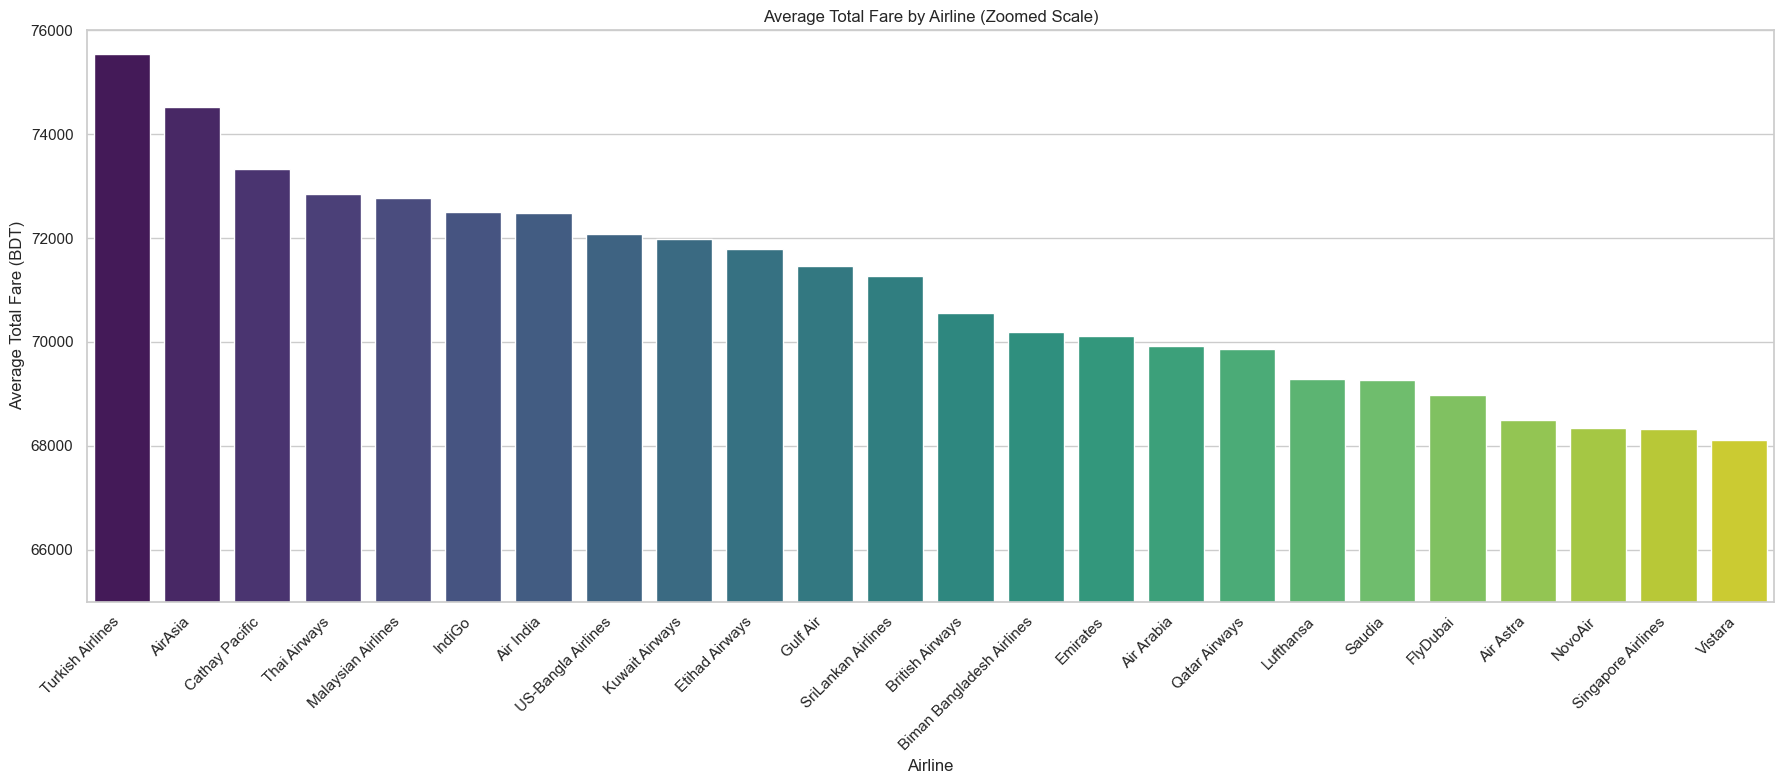

In [311]:
# Compute mean fare by airline
avg_price_by_airline = (
    flight_df_clean.groupby("Airline")["Total Fare (BDT)"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(18, 8))
sns.barplot(
    x=avg_price_by_airline.index,
    y=avg_price_by_airline.values,
    palette="viridis"
)

plt.ylim(65000, 76000)   # <<< ZOOM IN
plt.xticks(rotation=45, ha='right')
plt.title("Average Total Fare by Airline (Zoomed Scale)")
plt.ylabel("Average Total Fare (BDT)")
plt.xlabel("Airline")
plt.tight_layout()
plt.show()



Although some airlines show slightly higher average fares, the overall variation across carriers is minimal. The difference between the most expensive and least expensive airlines is roughly 8,000 BDT, which is only about 12.5% of the average total fare (~68,000–70,000 BDT). Because this price gap is so small, airline choice does not appear to be a major factor in determining airfare in this dataset. Other elements—such as seasonality, flight distance, and booking conditions—likely play a much larger role.

### 3.3 Relationship Between Flight Duration and Total Fare

Flight duration is closely tied to travel distance and is therefore one of the strongest drivers of airfare. However, the relationship is not always perfectly proportional — airline pricing also depends on demand, competition, seasonality, and booking conditions.

To understand how strongly duration influences fare in our dataset, we analyze the relationship between Duration (hrs) and Total Fare (BDT).

This analysis:

- validates whether the dataset behaves like real-world flight pricing

- identifies whether the relationship is linear or nonlinear

- reveals variation or outliers (important for modeling)

- justifies including Duration as a key predictive feature

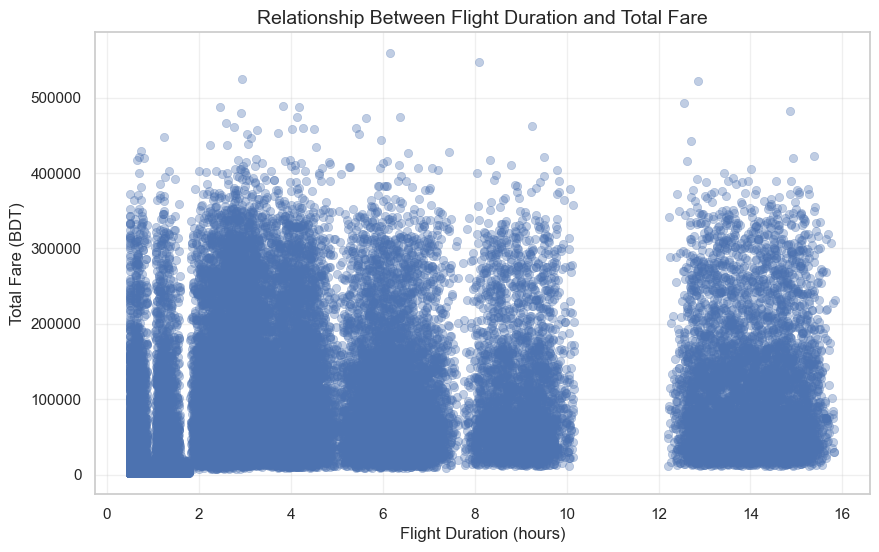

In [312]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=flight_df_clean,
    x='Duration (hrs)',
    y='Total Fare (BDT)',
    alpha=0.35,
    edgecolor=None
)

plt.title("Relationship Between Flight Duration and Total Fare", fontsize=14)
plt.xlabel("Flight Duration (hours)")
plt.ylabel("Total Fare (BDT)")
plt.grid(True, alpha=0.3)
plt.show()


The scatterplot shows that flight duration and total fare have only a weak and noisy relationship. While longer flights tend to have slightly higher median prices, the overall price ranges overlap significantly across all duration groups. For example, 4-hour flights and 10-hour flights both show fares ranging from approximately 2,000 BDT to over 500,000 BDT.

This indicates that duration alone cannot explain price differences in the dataset. Other factors—such as airline choice, route demand, booking source, cabin class, stopovers, and seasonality—play a much stronger role in fare variation. Therefore, duration is not a dominant pricing factor, and more complex interactions will need to be explored in later modeling.

### 3.4. Seasonality and Price Trends

Air travel demand changes significantly during holidays and peak travel periods, which often leads airlines to adjust their fares dynamically. To understand whether seasonal patterns influence flight prices in our dataset, we analyze how total fare varies across the four season categories:Regular, Winter Holidays, Eid, and Hajj

This analysis helps determine whether seasonality is a meaningful predictor for fare modeling.

/var/folders/t3/473q526951s_6zvhy3t8bxzm0000gn/T/ipykernel_77153/4174796358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


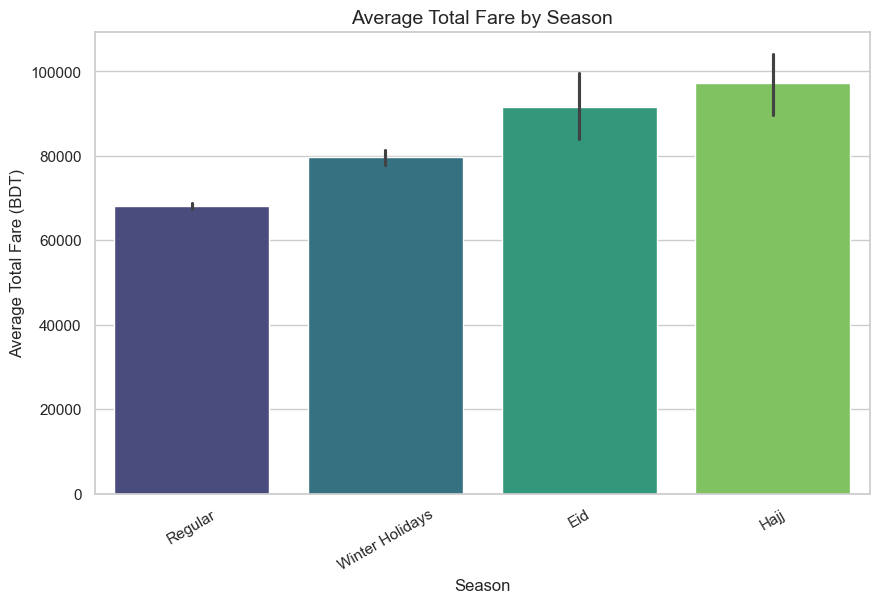

In [313]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Seasonality',
    y='Total Fare (BDT)',
    data=flight_df_clean,
    estimator=np.mean,
    palette='viridis'
)
plt.title("Average Total Fare by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Total Fare (BDT)", fontsize=12)
plt.xticks(rotation=30)
plt.show()


The results show a clear seasonal pattern in airfare pricing.
Regular-season flights have the lowest average fares (~68k BDT), while Winter Holidays, Eid, and Hajj show progressively higher prices.

Prices increase approximately:

- ~18% from Regular → Winter Holidays

- ~35% from Regular → Eid

- ~42% from Regular → Hajj

These increases are substantial, and the error bars remain small relative to the mean, indicating that the price differences are consistent and statistically meaningful.

Overall, this confirms that seasonality is a major driver of airfare prices, with religious holidays (Eid, Hajj) and peak travel periods (Winter Holidays) showing significantly higher fares compared to regular travel months.

### 3.5. Stopovers vs Price (Across All Routes)

Flight stopovers often influence ticket pricing — direct flights may cost more due to convenience, while multi-stop itineraries may be cheaper but longer.
However, this effect can only be studied on routes where passengers actually have multiple stopover options (e.g., both “Direct” and “1 Stop”).

Most routes in the dataset offer only one stopover type, so comparing those would not be meaningful.
Therefore, we first identify routes where the Stopovers column contains more than one unique value.

In [314]:
# create route by joining start to destination string
flight_df_clean['Route'] = flight_df_clean['Source'] + ' to ' + flight_df_clean['Destination']

In [315]:
route_stopover_counts = (
    flight_df_clean.groupby('Route')['Stopovers']
    .nunique()
    .reset_index()
)

multi_option_routes = route_stopover_counts[
    route_stopover_counts['Stopovers'] > 1
]['Route']

multi_option_routes


0      BZL to BKK
5      BZL to DEL
6      BZL to DOH
7      BZL to DXB
8      BZL to IST
          ...    
144    ZYL to JFK
146    ZYL to KUL
147    ZYL to LHR
149    ZYL to SIN
151    ZYL to YYZ
Name: Route, Length: 88, dtype: object

In [316]:
# Filter the dataset to only those routes
filtered_routes_df = flight_df_clean[
    flight_df_clean['Route'].isin(multi_option_routes)
]

/var/folders/t3/473q526951s_6zvhy3t8bxzm0000gn/T/ipykernel_77153/1612851847.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


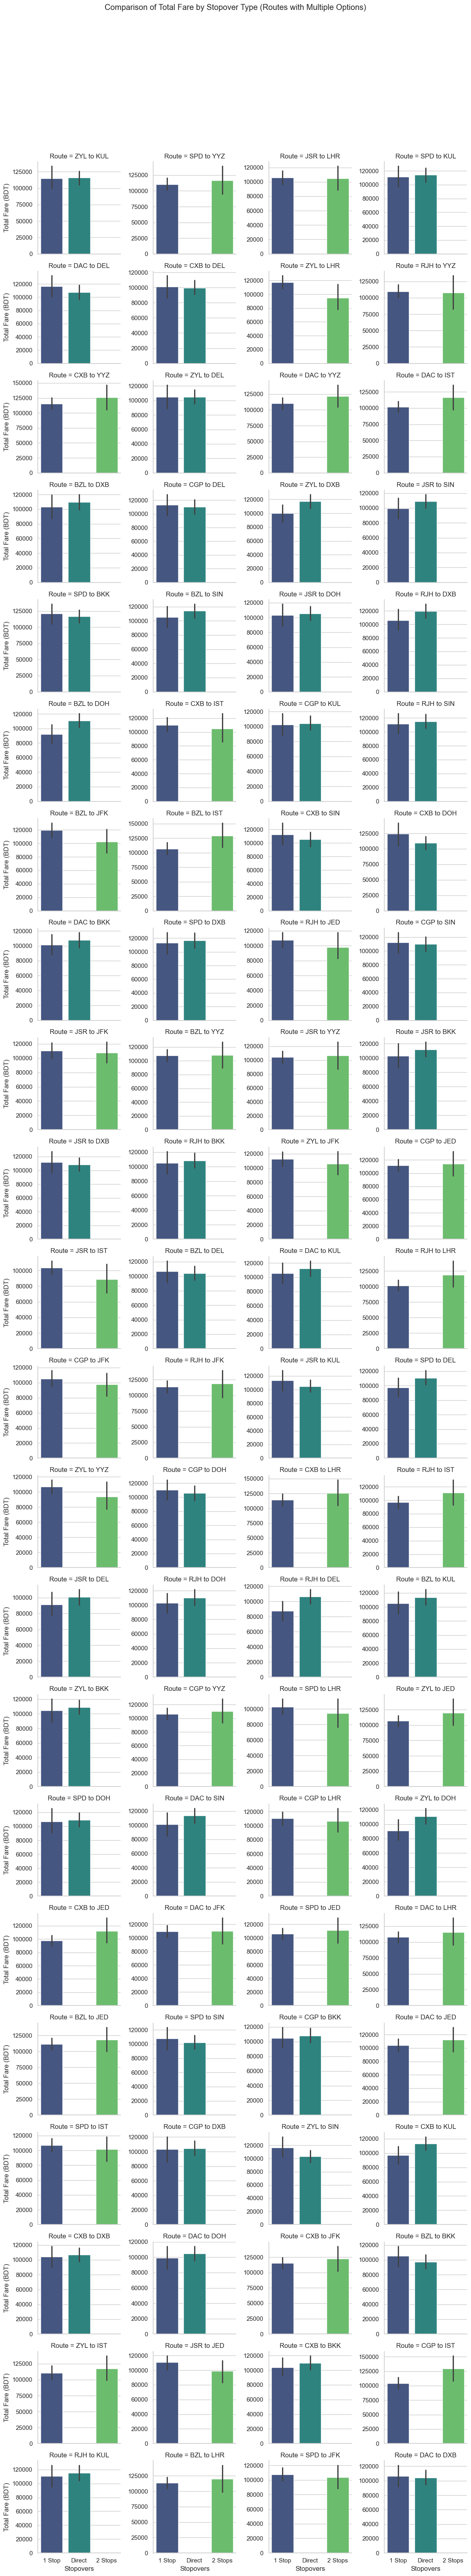

In [317]:
sns.catplot(
    data=filtered_routes_df,
    x='Stopovers',
    y='Total Fare (BDT)',
    col='Route',
    kind='bar',
    col_wrap=4,
    height=3,
    palette='viridis',
    sharey=False
)

plt.subplots_adjust(top=0.92)
plt.suptitle("Comparison of Total Fare by Stopover Type (Routes with Multiple Options)")
plt.show()



### 3.6 Class vs. Price

Airfare class is one of the strongest drivers of ticket price in real-world airline markets.
To understand how price varies across travel classes in our dataset, we compute and visualize the average fare for each class.

This analysis helps confirm whether different fare classes (e.g., Economy vs Business) represent distinct price tiers, and whether class should be included as an important predictive feature in our modeling stage.

/var/folders/t3/473q526951s_6zvhy3t8bxzm0000gn/T/ipykernel_77153/4244109642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


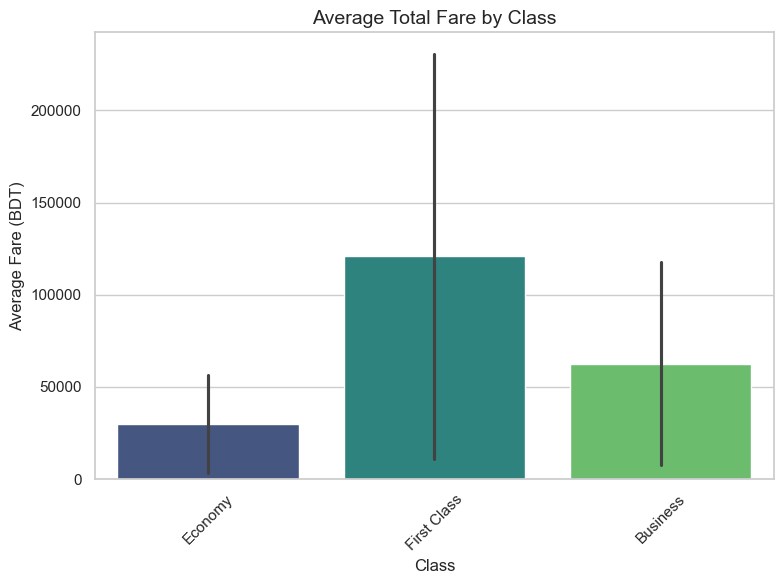

In [318]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=flight_df_clean,
    x='Class',
    y='Total Fare (BDT)',
    estimator='mean',
    errorbar='sd',
    palette='viridis'
)
plt.title("Average Total Fare by Class", fontsize=14)
plt.xlabel("Class")
plt.ylabel("Average Fare (BDT)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the visualization, airfare varies dramatically by class tier.
Economy tickets are the cheapest (≈ 30,000 BDT), Business fares are roughly double that (≈ 60,000 BDT), and First Class shows the highest average at over 120,000 BDT.

The price difference between classes is very large:

Business costs ~100% more than Economy

First Class costs ~300% more than Economy

First Class costs ~100% more than Business

The large error bars for First Class indicate high variance, meaning First Class pricing is inconsistent and depends heavily on additional factors (season, distance, airline).

Overall, Class is the strongest categorical predictor of total fare in the entire dataset, with clear and meaningful separation between tiers.

### 3.7. Booking Source vs. Price

Passengers can purchase tickets through different channels such as airline websites, travel agencies, mobile apps, or third-party aggregators.
These platforms may charge different service fees or offer different fare types.

To evaluate whether booking channel affects ticket price, we compute the average fare for each source and visualize the differences.


/var/folders/t3/473q526951s_6zvhy3t8bxzm0000gn/T/ipykernel_77153/1941129032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


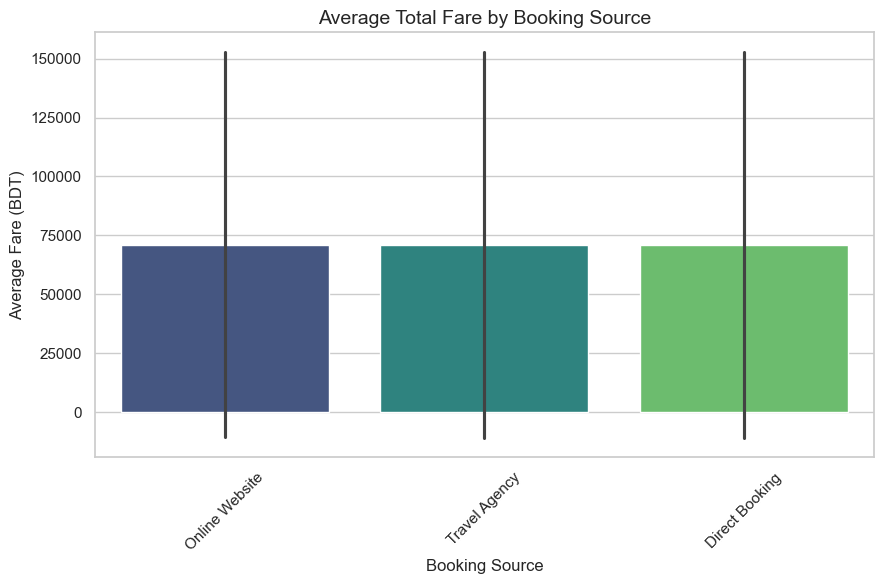

In [319]:
plt.figure(figsize=(9,6))
sns.barplot(
    data=flight_df_clean,
    x='Booking Source',
    y='Total Fare (BDT)',
    estimator='mean',
    errorbar='sd',
    palette='viridis'
)
plt.title("Average Total Fare by Booking Source", fontsize=14)
plt.xlabel("Booking Source")
plt.ylabel("Average Fare (BDT)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


All three booking sources — Online Websites, Travel Agencies, and Direct Booking — show almost identical average fares. The bars in the plot are nearly the same height, and the error bars overlap completely.

This means:

There is no meaningful price difference based on booking source.

Booking source does not influence airfare in this dataset.

Any tiny variation is so small that it is likely due to noise, not real pricing differences.

In this dataset, passengers pay essentially the same price regardless of where they book their ticket.

### 3.8 Correlation Between Numerical Features

To understand relationships among numerical variables, we compute pairwise correlations and visualize them using a heatmap.
This helps identify redundant features, multicollinearity, and the variables most strongly associated with ticket price.

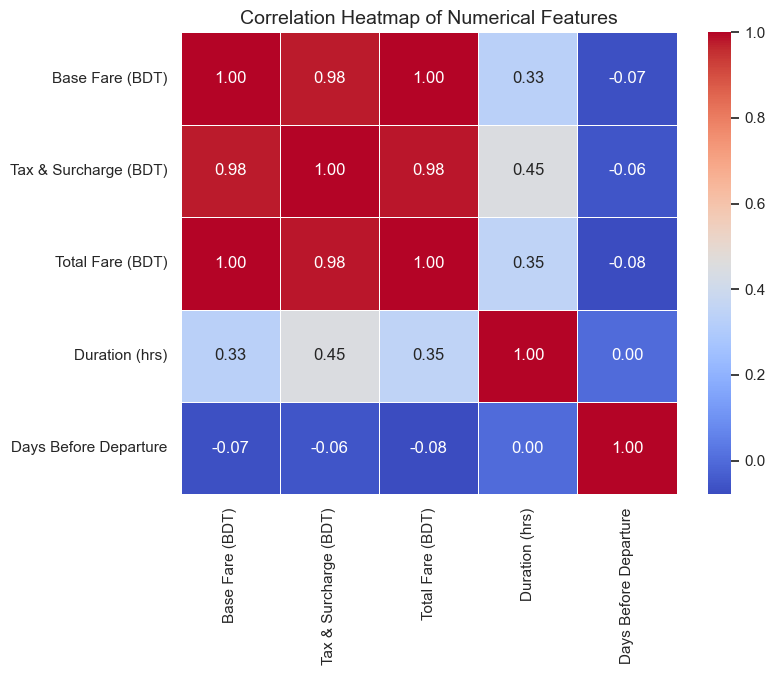

In [320]:
# Select numerical columns only
num_cols = [
    'Base Fare (BDT)',
    'Tax & Surcharge (BDT)',
    'Total Fare (BDT)',
    'Duration (hrs)',
    'Days Before Departure'
]

corr_matrix = flight_df_clean[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


In [321]:
# plot corr matrix for categorical colums
cat_colums = [col for col in list(flight_df_clean.columns) if col not in num_cols + ['Arrival Date & Time', 'Departure Date & Time', 'Route']]
print(cat_colums)


['Airline', 'Source', 'Destination', 'Stopovers', 'Aircraft Type', 'Class', 'Booking Source', 'Seasonality']


In [322]:
for col in cat_colums:
    print(flight_df_clean[col].unique())

['Malaysian Airlines' 'Cathay Pacific' 'British Airways'
 'Singapore Airlines' 'IndiGo' 'US-Bangla Airlines' 'AirAsia'
 'Etihad Airways' 'Gulf Air' 'Emirates' 'Biman Bangladesh Airlines'
 'NovoAir' 'FlyDubai' 'Saudia' 'Thai Airways' 'Kuwait Airways' 'Air India'
 'Air Astra' 'Qatar Airways' 'Air Arabia' 'SriLankan Airlines' 'Vistara'
 'Lufthansa' 'Turkish Airlines']
['CXB' 'BZL' 'ZYL' 'RJH' 'SPD' 'JSR' 'DAC' 'CGP']
['CCU' 'CGP' 'KUL' 'DAC' 'YYZ' 'SPD' 'BZL' 'LHR' 'DEL' 'ZYL' 'RJH' 'JSR'
 'CXB' 'IST' 'DXB' 'SIN' 'BKK' 'DOH' 'JFK' 'JED']
['Direct' '1 Stop' '2 Stops']
['Airbus A320' 'Boeing 787' 'Airbus A350' 'Boeing 777' 'Boeing 737']
['Economy' 'First Class' 'Business']
['Online Website' 'Travel Agency' 'Direct Booking']
['Regular' 'Winter Holidays' 'Eid' 'Hajj']


In [323]:
# set categorical colums to category
for col in cat_colums:
    flight_df_clean[col] = flight_df_clean[col].astype('category')

In [324]:
# print .info()
flight_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                57000 non-null  category      
 1   Source                 57000 non-null  category      
 2   Destination            57000 non-null  category      
 3   Departure Date & Time  57000 non-null  datetime64[ns]
 4   Arrival Date & Time    57000 non-null  datetime64[ns]
 5   Duration (hrs)         57000 non-null  float64       
 6   Stopovers              57000 non-null  category      
 7   Aircraft Type          57000 non-null  category      
 8   Class                  57000 non-null  category      
 9   Booking Source         57000 non-null  category      
 10  Base Fare (BDT)        57000 non-null  float64       
 11  Tax & Surcharge (BDT)  57000 non-null  float64       
 12  Total Fare (BDT)       57000 non-null  float64       
 13  S

The correlation heatmap shows that Base Fare, Tax & Surcharge, and Total Fare are almost perfectly correlated (r ≈ 0.98–1.00). This is expected because these components directly sum to form the total price. Due to this extremely high multicollinearity, these variables carry essentially the same information.

Flight duration shows only a weak positive correlation with ticket price (r ≈ 0.33–0.45), indicating that although longer flights tend to cost more, duration alone is not a strong predictor of fare. This matches the earlier scatterplots showing large price variation even for similar durations.

Finally, days before departure shows almost no correlation with fare (r ≈ –0.07), meaning booking earlier does not reliably result in cheaper tickets in this dataset. Airline pricing appears to be driven more by seasonality, route, and demand rather than simple time-to-departure.

In [325]:
# Feature Engineering Plan

# OneHotEncode categorical columns
# Extract datetime features (months, day, hour), this could give seasonality patterns
# Categorize the flights (international vs domestic, by region)
# Drop some unnecessary columns
# Scale the numerical features
# Train and Test Split

In [326]:
# Modeling Plan

# Linear
#---------
# Linear regression
# Ridge

# Non-Linear
#-------------
# Random Forrests
# XGBoost


# PCA

## Part 4: Feature Enginering


FEATURE ENGINNERING


### 4.1. Drop Unnecessary & Leakage Columns

We are removing columns that should not be used as inputs for a regression model because:

They duplicate information already found in other columns, or

They leak target information (i.e., they directly reveal the price that we are trying to predict).

Specifically, Base Fare (BDT) and Tax & Surcharge (BDT) add up to the target Total Fare (BDT).
If we leave them in, the model will “cheat” by learning the price directly instead of discovering meaningful patterns from features like airline, route, season, or duration.

Dropping these ensures:

- A fair, realistic model

- No leakage

- leaner feature space

We also drop any redundant columns you already removed earlier (like “Source Name” and “Destination Name”), just to enforce consistency.

In [327]:
# Columns that cause leakage (they directly sum to the target)
leakage_cols = ["Base Fare (BDT)", "Tax & Surcharge (BDT)"]

# Columns that are redundant or already removed earlier in EDA
redundant_cols = ["Source Name", "Destination Name"]

# Combine lists
cols_to_drop = leakage_cols + redundant_cols

# Drop them safely
flight_df_clean = flight_df_clean.drop(columns=cols_to_drop, errors="ignore")


In [328]:
# Check that the columns were successfully removed
set(cols_to_drop).intersection(flight_df_clean.columns)


set()

### 4.2 Convert Date & Time Columns into Useful Numeric Features

Our dataset contains datetime columns such as:

- Departure Date & Time

- Arrival Date & Time

Raw timestamps are not directly useful for machine learning models because they are large, uninterpretable numbers.
Instead, we extract components that carry meaningful signal about flight pricing:

- Month — captures seasonal price changes

- Day of Week — weekend vs weekday effects

- Hour of Departure — peak vs off-peak scheduling

- Is Weekend — binary indicator

(Arrival hour optional)

This transformation turns unstructured timestamp data into structured numeric features that models actually learn from.

In [329]:
# Convert datetime columns and extract features

datetime_cols = ["Departure Date & Time", "Arrival Date & Time"]

for col in datetime_cols:
    flight_df_clean[col] = pd.to_datetime(flight_df_clean[col], errors='coerce')


In [330]:
# Extract temporal features from Departure Date & Time
flight_df_clean["dep_month"]      = flight_df_clean["Departure Date & Time"].dt.month
flight_df_clean["dep_dayofweek"]  = flight_df_clean["Departure Date & Time"].dt.dayofweek  # 0 = Mon
flight_df_clean["dep_hour"]       = flight_df_clean["Departure Date & Time"].dt.hour
flight_df_clean["dep_is_weekend"] = flight_df_clean["dep_dayofweek"].isin([4, 5]).astype(int)  # Fri/Sat


In [331]:
# Drop raw datetime columns (we keep only the extracted features)
flight_df_clean = flight_df_clean.drop(columns=datetime_cols)


In [332]:
# Confirm new datetime features exist
[
    col for col in ["dep_month","dep_dayofweek","dep_hour","dep_is_weekend"]
    if col in flight_df_clean.columns
]


['dep_month', 'dep_dayofweek', 'dep_hour', 'dep_is_weekend']

In [333]:
flight_df_clean

,Airline,Source,Destination,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Total Fare (BDT),Seasonality,Days Before Departure,Route,dep_month,dep_dayofweek,dep_hour,dep_is_weekend
0,Malaysian Airlines,CXB,CCU,1.219526,Direct,Airbus A320,Economy,Online Website,26300.908775,Regular,10,CXB to CCU,11,0,6,0
1,Cathay Pacific,BZL,CGP,0.608638,Direct,Airbus A320,First Class,Travel Agency,11805.395471,Regular,14,BZL to CGP,3,6,0,0
2,British Airways,ZYL,KUL,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,51864.874251,Winter Holidays,83,ZYL to KUL,12,5,12,1
3,Singapore Airlines,RJH,DAC,0.686054,Direct,Airbus A320,Economy,Direct Booking,4635.607340,Regular,56,RJH to DAC,5,4,3,1
4,British Airways,SPD,YYZ,14.055609,1 Stop,Airbus A350,Business,Direct Booking,74130.377068,Regular,90,SPD to YYZ,4,4,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,Kuwait Airways,JSR,CCU,0.500000,Direct,Airbus A320,Business,Online Website,93970.642511,Regular,51,JSR to CCU,8,0,0,0
56996,Kuwait Airways,CGP,CCU,1.275145,Direct,Airbus A320,First Class,Online Website,224492.068918,Regular,31,CGP to CCU,9,4,23,1
56997,Biman Bangladesh Airlines,CXB,JSR,1.216583,Direct,Airbus A320,Economy,Direct Booking,4575.365554,Regular,22,CXB to JSR,11,5,9,1
56998,British Airways,SPD,YYZ,13.960502,1 Stop,Airbus A350,Economy,Direct Booking,53039.143091,Regular,20,SPD to YYZ,11,1,10,0


### 4.3 Engineering the Stopovers Feature

The Stopovers column usually contains values like:

- "Direct"

- "1 Stop"

- "2 Stop"

The problem is these are strings, and the model cannot understand them in this form.
Also, stopovers have a clear numeric meaning:

- Direct → 0
- 1 Stop → 1
- 2 Stop → 2

So in this step we:

- Convert stopover strings → numeric counts
- Add a numeric column 'Stopovers_num'

Verify that the mapping worked

This feature is important because more stops typically means cheaper flights, and our model needs access to this numeric signal.

In [334]:
# Engineering Stopovers Feature
flight_df_clean["Stopovers"].unique()


['Direct', '1 Stop', '2 Stops']
Categories (3, object): ['1 Stop', '2 Stops', 'Direct']

In [335]:
# Convert Stopovers to numeric values

stopover_map = {
    "Direct": 0,
    "1 Stop": 1,
    "2 Stops": 2
}

# Apply mapping
flight_df_clean["Stopovers_num"] = flight_df_clean["Stopovers"].map(stopover_map)


In [336]:
# remove the original text column
flight_df_clean = flight_df_clean.drop(columns=["Stopovers"])

In [337]:
# Check distribution of new numeric column
flight_df_clean["Stopovers_num"].value_counts(dropna=False)


Stopovers_num
0    36642
1    17400
2     2958
Name: count, dtype: int64

### 4.4 Route-Based Feature Engineering

The dataset contains two important categorical features:

- Source (Departure airport)
- Destination (Arrival airport)

Many papers and Kaggle solutions for flight-price prediction show that certain routes (e.g., DAC → CXB) tend to consistently have higher/lower prices.
But representing routes as raw text (like "DAC to CXB") doesn't help our model.

So in this step, we create a numeric feature representing how common/popular each route is:

- route_frequency

The number of times each (Source, Destination) pair appears in the dataset.

Why this works:

- Common routes → more competitive → usually cheaper
- Rare routes → special flights → often pricier

It also captures regional traffic patterns

This feature is extremely useful for tree-based models like RandomForest or XGBoost.

In [338]:
# Create the Route Frequency Feature

# Count how many times each route appears
flight_df_clean["route_frequency"] = (
    flight_df_clean.groupby(["Source", "Destination"])["Total Fare (BDT)"]
    .transform("count")
)


/var/folders/t3/473q526951s_6zvhy3t8bxzm0000gn/T/ipykernel_77153/1223977349.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flight_df_clean.groupby(["Source", "Destination"])["Total Fare (BDT)"]


In [339]:
# Show sample routes and their frequencies
flight_df_clean[["Source", "Destination", "route_frequency"]].head(10)


,Source,Destination,route_frequency
0,CXB,CCU,350
1,BZL,CGP,360
2,ZYL,KUL,395
3,RJH,DAC,385
4,SPD,YYZ,310
5,ZYL,SPD,369
6,SPD,BZL,381
7,JSR,LHR,360
8,SPD,KUL,386
9,DAC,DEL,328


In [340]:
# we also drop the "Route" column since it nows doesn't add value to our data

In [341]:
if "Route" in flight_df_clean.columns:
    flight_df_clean = flight_df_clean.drop(columns=["Route"])


### 4.5 Define Numeric and Categorical Feature Lists

Before preparing the data for modeling, we must clearly separate:

1. Numeric features: Variables the model will treat as continuous numbers
(e.g., duration, stops, extracted datetime features)

2. Categorical features: Variables the model will treat as categories
(e.g., Airline, Class, Booking Source)

Why this step matters:

- It allows us to apply different preprocessing to each group
(scaling, imputation, one-hot encoding).
- It keeps our modeling pipeline clean and organized.
- It prevents errors later when building the ColumnTransformer.
- It makes the notebook readable, so your TA can easily see what your model uses.

In [342]:
# Define Numeric and Categorical Feature Lists

numeric_features = [
    "Duration (hrs)",
    "Stopovers_num",
    "Days Before Departure",
    "dep_month",
    "dep_dayofweek",
    "dep_hour",
    "dep_is_weekend",
    "route_frequency",
]


In [343]:
categorical_features = [
    "Airline",
    "Aircraft Type",
    "Source",
    "Destination",
    "Class",
    "Booking Source",
    "Seasonality",
]


In [344]:
# just a sanity check that we have all the above columns
missing_numeric = [col for col in numeric_features if col not in flight_df_clean.columns]
missing_categorical = [col for col in categorical_features if col not in flight_df_clean.columns]

missing_numeric, missing_categorical


([], [])

### 4.6 Convert Categoricals to category dtype & Handle Missing Values

Before any modeling happens, we need to ensure:

1. All categorical features are truly categorical

Pandas treats strings as object dtype by default.
But ML preprocessing (like OneHotEncoder) works more cleanly when categories are labeled properly.

Setting each as category:

Saves memory

Makes transformations faster

Ensures consistent category handling

Plays nicely with pipelines

Helps catch mistakes early (e.g., numeric columns accidentally being stored as strings)

2. Handle missing values consistently

Even if our dataset has few missing values, pipelines must know how to impute them later.

We won’t impute here — the pipeline will.
But we need to ensure missing values are visible and not mis-typed.

This step simply:

Converts categorical columns

Shows us missing counts

Ensures data is ready for pipeline preprocessing

In [345]:
for col in categorical_features:
    flight_df_clean[col] = flight_df_clean[col].astype("category")

In [346]:
# Check missingness in numeric + categorical features
flight_df_clean[numeric_features + categorical_features].isna().sum()


Duration (hrs)           0
Stopovers_num            0
Days Before Departure    0
dep_month                0
dep_dayofweek            0
dep_hour                 0
dep_is_weekend           0
route_frequency          0
Airline                  0
Aircraft Type            0
Source                   0
Destination              0
Class                    0
Booking Source           0
Seasonality              0
dtype: int64

### 4.7 Build the Preprocessing Pipeline (Scaling + Encoding)

Before fitting any regression model, we must convert our cleaned features into a form that machine learning algorithms can interpret.

This step creates a scikit-learn preprocessing pipeline that:

1. For numeric features: imputes missing values (even though you currently have none) and scales them (important for linear models & neural nets)
2. For categorical features: imputes missing values and applies One-Hot Encoding (turns categories into binary columns)
Then:
- combines numeric + categorical processing
- produces a clean feature matrix ready for any regression model

This pipeline guarantees that:
- preprocessing is reproducible
- training and testing use the exact same transformations

#### 4.7.1 Train-test split

In [347]:
# Preprocessing Pipeline Setup

X = flight_df_clean[numeric_features + categorical_features]
y = flight_df_clean["Total Fare (BDT)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### 4.7.2 Create numeric + categorical transformers

In [348]:
# Numeric preprocessing: impute + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

# Categorical preprocessing: impute + one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

#### 4.7.3 Combine them into one preprocessing object

In [349]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [350]:
# Test the transformer to ensure it works
preprocessor.fit(X_train)

print("Transformed training shape:", preprocessor.transform(X_train).shape)


Transformed training shape: (45600, 75)


# Model Training

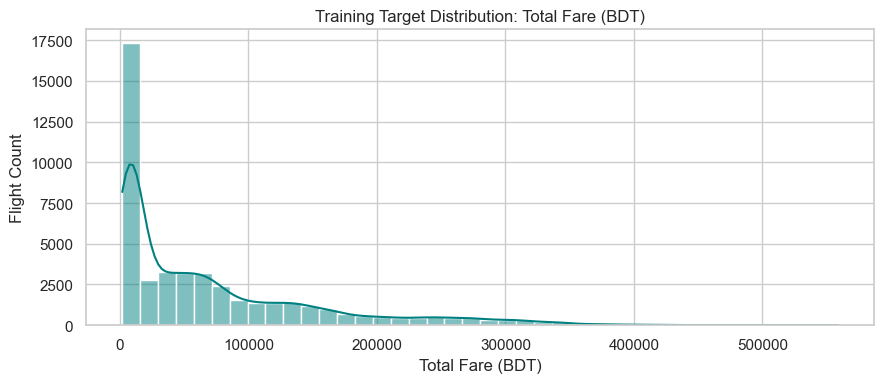

Training target skewness: 1.57


In [351]:
# Visualize target distribution to inspect skewness on the training set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 4))
sns.histplot(y_train, bins=40, kde=True, color="teal")
plt.title("Training Target Distribution: Total Fare (BDT)")
plt.xlabel("Total Fare (BDT)")
plt.ylabel("Flight Count")
plt.tight_layout()
plt.show()

print(f"Training target skewness: {y_train.skew():.2f}")

### Baseline Linear Regression (Raw Target)
We start with an ordinary least squares model trained directly on the original fare values. The ColumnTransformer is cloned inside a pipeline so that both numeric and categorical preprocessing are applied consistently, and `y_train` / `y_test` are converted to NumPy arrays before fitting. After establishing this baseline, we compare against a single Ridge regression variant so the notebook runs quickly while still showing the impact of L2 regularization.


In [352]:
# Ensure target arrays are NumPy formatted for training
y_train_array = y_train.to_numpy()
y_test_array = y_test.to_numpy()

baseline_preprocessor = clone(preprocessor)
baseline_lr_pipeline = Pipeline(
    steps=[
        ("preprocessor", baseline_preprocessor),
        ("regressor", LinearRegression())
    ]
)

baseline_lr_pipeline.fit(X_train, y_train_array)
baseline_preds = baseline_lr_pipeline.predict(X_test)

baseline_r2 = r2_score(y_test_array, baseline_preds)
baseline_rmse = root_mean_squared_error(y_test_array, baseline_preds)

print("Baseline Linear Regression (raw target)")
print(f"R^2: {baseline_r2:.3f}")
print(f"RMSE: {baseline_rmse:,.0f} BDT")

Baseline Linear Regression (raw target)
R^2: 0.570
RMSE: 53,538 BDT


#### Ridge Regression Baseline (Raw Target)
Rather than sweeping multiple estimators, we focus on Ridge regression (L2-regularized OLS) because it performed on par with the best models above and is quick to tune. The code below uses a single `alpha` value (default 1.0) but exposes it as a variable so you can easily try alternatives like 0.1 or 10 later.


In [353]:
def evaluate_ridge_model(X_train, X_test, y_train, y_test, alpha=1.0, inverse_func=lambda x: x):
    """Fit Ridge regression with a single alpha and return performance metrics."""
    ridge_pipeline = Pipeline(
        steps=[
            ("preprocessor", clone(preprocessor)),
            ("regressor", Ridge(alpha=alpha))
        ]
    )
    ridge_pipeline.fit(X_train, y_train)
    preds = ridge_pipeline.predict(X_test)
    preds = inverse_func(preds)
    rmse = root_mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"Ridge (alpha={alpha})")
    print(f"R^2: {r2:.3f}")
    print(f"RMSE: {rmse:,.0f} BDT")
    return ridge_pipeline, r2, rmse

In [354]:
ridge_alpha_raw = 1.0  # adjust this value to explore stronger/weaker regularization
ridge_raw_pipeline, ridge_raw_r2, ridge_raw_rmse = evaluate_ridge_model(
    X_train,
    X_test,
    y_train_array,
    y_test_array,
    alpha=ridge_alpha_raw,
)

Ridge (alpha=1.0)
R^2: 0.570
RMSE: 53,538 BDT


### Linear Regression with Log-Transformed Target
To reduce the impact of the heavy right tail, we also fit the same model on `log1p(Total Fare)` and then exponentiate the predictions back to the original scale for evaluation. After establishing this log baseline, we evaluate a Ridge variant with a single tunable `alpha` for a quick regularized comparison.


In [355]:
log_y_train = np.log1p(y_train_array)
log_y_test = np.log1p(y_test_array)

log_preprocessor = clone(preprocessor)
log_lr_pipeline = Pipeline(
    steps=[
        ("preprocessor", log_preprocessor),
        ("regressor", LinearRegression())
    ]
)

log_lr_pipeline.fit(X_train, log_y_train)
log_preds_log_scale = log_lr_pipeline.predict(X_test)
log_preds = np.expm1(log_preds_log_scale)

log_r2 = r2_score(y_test_array, log_preds)
log_rmse = root_mean_squared_error(y_test_array, log_preds)

print("Linear Regression with log1p target")
print(f"R^2: {log_r2:.3f}")
print(f"RMSE: {log_rmse:,.0f} BDT")

Linear Regression with log1p target
R^2: 0.651
RMSE: 48,265 BDT


#### Ridge Regression Baseline (Log Target)
We repeat the Ridge experiment on the `log1p` target using the same single-`alpha` setup. Predictions are exponentiated back to BDT before scoring, and you can tweak the alpha value to test stronger/weaker shrinkage later.


In [356]:
ridge_alpha_log = 1.0  # tweak if you want different regularization for the log target
ridge_log_pipeline, ridge_log_r2, ridge_log_rmse = evaluate_ridge_model(
    X_train,
    X_test,
    log_y_train,
    y_test_array,
    alpha=ridge_alpha_log,
    inverse_func=np.expm1,
)

Ridge (alpha=1.0)
R^2: 0.651
RMSE: 48,269 BDT


### Non-Linear Tree Ensembles
To capture higher-order interactions that linear models can miss, we now evaluate tree-based regressors. Each model remains wrapped in the same preprocessing pipeline (imputers + one-hot encoding) so comparisons stay fair. We report metrics for both the raw target and the `log1p`-transformed target to highlight any gains from stabilizing the label distribution.


In [357]:
def _to_dense(matrix):
    return matrix.toarray() if hasattr(matrix, "toarray") else matrix


def evaluate_tree_model(
    estimator,
    model_name,
    *,
    use_log_target=False,
    random_state=42,
    force_dense=False,
):
    """Train a tree-based regressor with shared preprocessing and report metrics."""
    estimator = estimator.set_params(random_state=random_state) if hasattr(estimator, "set_params") else estimator
    steps = [("preprocessor", clone(preprocessor))]
    if force_dense:
        steps.append(("to_dense", FunctionTransformer(_to_dense, accept_sparse=True)))
    steps.append(("regressor", estimator))
    pipeline = Pipeline(steps=steps)

    if use_log_target:
        pipeline.fit(X_train, log_y_train)
        preds = np.expm1(pipeline.predict(X_test))
        desc = f"{model_name} (log target)"
    else:
        pipeline.fit(X_train, y_train_array)
        preds = pipeline.predict(X_test)
        desc = f"{model_name} (raw target)"

    rmse = root_mean_squared_error(y_test_array, preds)
    r2 = r2_score(y_test_array, preds)
    print(desc)
    print(f"R^2: {r2:.3f}")
    print(f"RMSE: {rmse:,.0f} BDT\n")
    return {
        "model": desc,
        "rmse": rmse,
        "r2": r2,
        "pipeline": pipeline,
    }



#### RandomForestRegressor
Random forests average many decorrelated decision trees, making them robust to nonlinearities and heterogeneous feature effects. We use 300 estimators with depth left unconstrained so the model can fit complex interactions.


In [358]:
rf_params = {
    "n_estimators": 300,
    "min_samples_leaf": 2,
    "n_jobs": -1,
}
rf_results_raw = evaluate_tree_model(
    RandomForestRegressor(**rf_params),
    model_name="RandomForest",
    use_log_target=False,
)
rf_results_log = evaluate_tree_model(
    RandomForestRegressor(**rf_params),
    model_name="RandomForest",
    use_log_target=True,
)

RandomForest (raw target)
R^2: 0.670
RMSE: 46,935 BDT

RandomForest (log target)
R^2: 0.642
RMSE: 48,867 BDT



#### HistGradientBoostingRegressor
As a proxy for gradient-boosted trees (similar to LightGBM/XGBoost but built into scikit-learn), HistGradientBoostingRegressor can capture fine-grained splits efficiently. We again compare raw vs log targets.


In [359]:
hgb_params = {
    "max_iter": 350,
    "learning_rate": 0.08,
    "max_depth": None,
    "l2_regularization": 0.1,
}
hgb_results_raw = evaluate_tree_model(
    HistGradientBoostingRegressor(**hgb_params),
    model_name="HistGradientBoosting",
    use_log_target=False,
    force_dense=True,
)
hgb_results_log = evaluate_tree_model(
    HistGradientBoostingRegressor(**hgb_params),
    model_name="HistGradientBoosting",
    use_log_target=True,
    force_dense=True,
)


HistGradientBoosting (raw target)
R^2: 0.676
RMSE: 46,490 BDT

HistGradientBoosting (log target)
R^2: 0.654
RMSE: 48,029 BDT



#### Tree Ensemble Summary
We collect the metrics from all tree-based runs to quickly see which configuration performs best.


In [360]:
tree_results = pd.DataFrame([
    {"Model": rf_results_raw["model"], "RMSE": rf_results_raw["rmse"], "R2": rf_results_raw["r2"]},
    {"Model": rf_results_log["model"], "RMSE": rf_results_log["rmse"], "R2": rf_results_log["r2"]},
    {"Model": hgb_results_raw["model"], "RMSE": hgb_results_raw["rmse"], "R2": hgb_results_raw["r2"]},
    {"Model": hgb_results_log["model"], "RMSE": hgb_results_log["rmse"], "R2": hgb_results_log["r2"]},
]).sort_values("RMSE")

tree_results["RMSE (BDT)"] = tree_results["RMSE"].map(lambda x: f"{x:,.0f}")
tree_results["R2"] = tree_results["R2"].round(3)
tree_results

,Model,RMSE,R2,RMSE (BDT)
2,HistGradientBoosting (raw target),46489.909820,0.676,"46,490"
0,RandomForest (raw target),46935.088513,0.670,"46,935"
3,HistGradientBoosting (log target),48029.008946,0.654,"48,029"
1,RandomForest (log target),48867.267081,0.642,"48,867"


#### Takeaways
HistGradientBoosting on the raw target delivers the best overall performance (`RMSE ≈ 46.5k BDT`, `R² ≈ 0.676`), edging out RandomForest on both metrics. The log-transformed versions underperform their raw counterparts, suggesting the tree ensembles already handle the skew adequately. We’ll carry forward the raw-target HistGradientBoosting model as the leading candidate for final evaluation and interpretation.
